In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.458197,125.656250,5315.538086,72.907737,0.001568,-1.185772,43181,10.188252,...,1,0,1,2,1,3,2,2,0,DES
1,file0280.py.enc,pyth_cbc,7.907674,126.913587,5388.075685,73.403513,0.036156,-1.202440,193351,10.250954,...,13,8,7,6,7,4,9,4,4,DES
2,file0292.py.enc,pyth_cbc,7.971706,127.544835,5484.838611,74.059696,-0.005837,-1.211416,671401,10.313534,...,30,25,25,29,15,19,22,23,17,DES
3,file0392.py.enc,pyth_cbc,7.979720,128.113233,5355.573987,73.181787,-0.025887,-1.171720,1021821,10.269998,...,34,46,38,35,42,35,33,36,36,DES
4,file0302.py.enc,pyth_cbc,7.965502,128.098099,5443.436372,73.779647,0.000471,-1.211359,520845,10.263962,...,25,19,9,23,11,16,30,18,20,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996713,127.641806,5466.684179,73.937028,-0.002875,-1.202383,5932680,10.244568,...,200,199,235,232,241,233,204,228,220,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999135,127.626395,5463.937864,73.918454,-0.001701,-1.198831,26218634,10.281043,...,985,995,1009,1012,998,990,963,941,967,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998933,127.469611,5482.431137,74.043441,0.002666,-1.204016,17013188,10.284543,...,639,585,619,630,640,663,659,667,673,AES
5998,image_0152.bmp.enc,bmp_cbc,7.998955,127.674679,5448.662028,73.815053,-0.005070,-1.199387,18419094,10.272160,...,640,677,660,700,706,675,633,643,680,AES


In [4]:
df_all_3keys = pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.454081,126.033654,5639.748867,75.098261,0.063670,-1.257391,44000,10.284417,...,1,3,0,2,2,1,2,0,3,DES
1,file0280.py.enc,pyth_cbc,7.910468,126.864130,5355.358713,73.180316,0.007863,-1.157829,190954,10.187215,...,6,12,5,2,7,9,9,10,11,DES
2,file0292.py.enc,pyth_cbc,7.970668,129.598067,5337.392791,73.057462,-0.039944,-1.191557,665103,10.265047,...,22,21,26,19,31,21,28,21,21,DES
3,file0392.py.enc,pyth_cbc,7.977258,127.814719,5501.092116,74.169348,-0.006067,-1.216917,1024321,10.282553,...,32,37,32,41,33,42,40,32,42,DES
4,file0302.py.enc,pyth_cbc,7.960300,128.923948,5599.631757,74.830687,-0.025540,-1.226165,521056,10.266040,...,24,15,15,24,11,24,21,23,16,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996694,127.215645,5445.179863,73.791462,0.007323,-1.192745,5954208,10.263139,...,209,232,246,189,213,219,200,236,228,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999316,127.490994,5461.161436,73.899671,-0.000220,-1.199276,26185766,10.274597,...,948,994,945,973,977,1030,967,922,982,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998846,127.097900,5466.979517,73.939026,0.007192,-1.203100,17020385,10.286719,...,625,643,596,586,609,645,621,649,587,AES
5998,image_0152.bmp.enc,bmp_cbc,7.999056,127.389992,5474.344589,73.988814,0.004690,-1.202521,18413683,10.270651,...,744,705,704,690,693,687,701,701,715,AES


In [5]:
df_all_6keys = pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.457811,125.117788,6004.353914,77.487766,0.023000,-1.285210,42131,10.063620,...,1,2,0,2,1,1,1,5,1,DES
1,file0280.py.enc,pyth_cbc,7.900738,129.473370,5517.060160,74.276915,-0.009668,-1.202889,195449,10.306419,...,9,11,4,7,8,10,8,7,6,DES
2,file0292.py.enc,pyth_cbc,7.970839,127.664924,5461.772230,73.903804,-0.011568,-1.208320,665495,10.268072,...,24,24,20,24,27,27,18,25,31,DES
3,file0392.py.enc,pyth_cbc,7.980570,128.539121,5389.724729,73.414745,-0.021827,-1.187214,1017957,10.250561,...,38,41,23,37,43,26,41,38,37,DES
4,file0302.py.enc,pyth_cbc,7.958628,129.039037,5446.386623,73.799638,-0.033335,-1.201518,526385,10.318404,...,19,18,15,24,23,12,14,17,26,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996706,127.024501,5462.256600,73.907081,0.007654,-1.198189,5972393,10.278799,...,205,231,199,219,239,223,211,223,203,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999263,127.389417,5467.314547,73.941291,0.004723,-1.199948,26150226,10.267622,...,987,934,934,1024,1010,1004,1008,944,1038,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998860,127.648905,5461.966512,73.905118,-0.001441,-1.197939,16929353,10.259173,...,640,629,634,605,610,681,667,618,660,AES
5998,image_0152.bmp.enc,bmp_cbc,7.998983,127.767765,5474.298513,73.988503,-0.003154,-1.200806,18364691,10.256979,...,674,663,698,687,698,719,680,666,701,AES


In [6]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x1109642e0>,
 <pandas.io.formats.style.Styler at 0x15ac64970>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.489833,0.010960,0.479738,0.010938,0.489833,0.010960,0.481715,0.010623,1.050038,0.778442
1,SVM,0.392333,0.012069,0.341164,0.026976,0.392333,0.012069,0.318201,0.021055,1.111275,0.697430
2,NaiveBayes,0.365833,0.009916,0.362415,0.077626,0.365833,0.009916,0.313137,0.013459,7.996761,0.689590
3,KNN,0.446500,0.014967,0.442276,0.013698,0.446500,0.014967,0.436361,0.015618,6.853347,0.716072
4,Bagging,0.470667,0.009781,0.458800,0.010879,0.470667,0.009781,0.461288,0.011479,1.080901,0.767580
5,AdaBoost,0.444333,0.009809,0.441271,0.018814,0.444333,0.009809,0.405864,0.017579,1.583679,0.747828


In [1]:
import pandas as pd
import io

csv_data = """
RandomForest,0.489833,0.010960,0.479738,0.010938,0.489833,0.010960,0.481715,0.010623,1.050038,0.778442
SVM,0.392333,0.012069,0.341164,0.026976,0.392333,0.012069,0.318201,0.021055,1.111275,0.697430
NaiveBayes,0.365833,0.009916,0.362415,0.077626,0.365833,0.009916,0.313137,0.013459,7.996761,0.689590
KNN,0.446500,0.014967,0.442276,0.013698,0.446500,0.014967,0.436361,0.015618,6.853347,0.716072
Bagging,0.470667,0.009781,0.458800,0.010879,0.470667,0.009781,0.461288,0.011479,1.080901,0.767580
AdaBoost,0.444333,0.009809,0.441271,0.018814,0.444333,0.009809,0.405864,0.017579,1.583679,0.747828
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame (opcjonalnie, pokaże tabelę w konsoli)
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.489833,0.010960,0.479738,0.010938,0.489833,0.010960,0.481715,0.010623,1.050038,0.778442
1,SVM,0.392333,0.012069,0.341164,0.026976,0.392333,0.012069,0.318201,0.021055,1.111275,0.697430
2,NaiveBayes,0.365833,0.009916,0.362415,0.077626,0.365833,0.009916,0.313137,0.013459,7.996761,0.689590
3,KNN,0.446500,0.014967,0.442276,0.013698,0.446500,0.014967,0.436361,0.015618,6.853347,0.716072
4,Bagging,0.470667,0.009781,0.458800,0.010879,0.470667,0.009781,0.461288,0.011479,1.080901,0.767580
5,AdaBoost,0.444333,0.009809,0.441271,0.018814,0.444333,0.009809,0.405864,0.017579,1.583679,0.747828


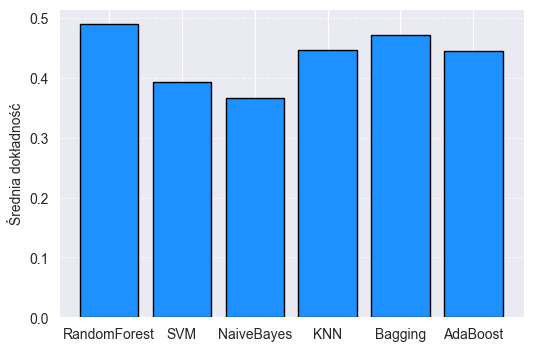

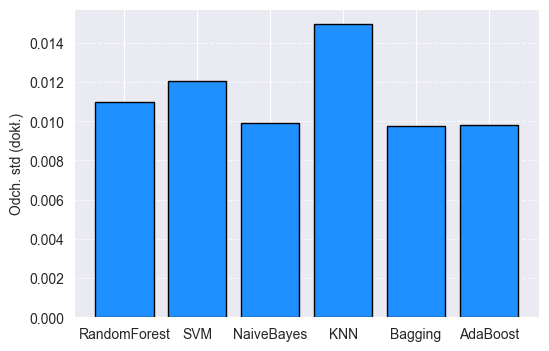

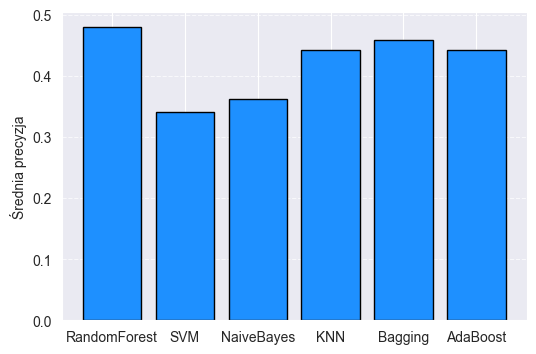

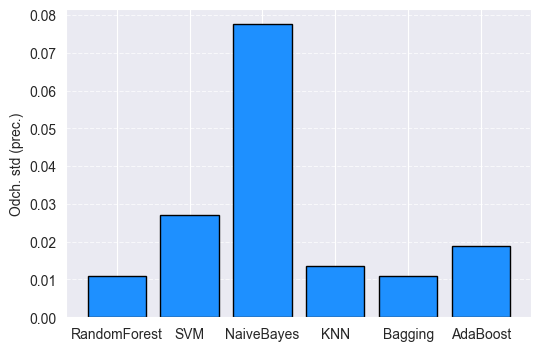

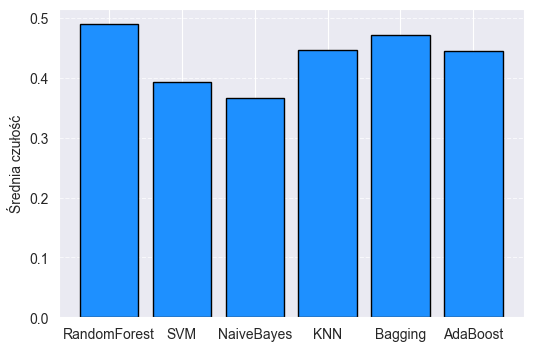

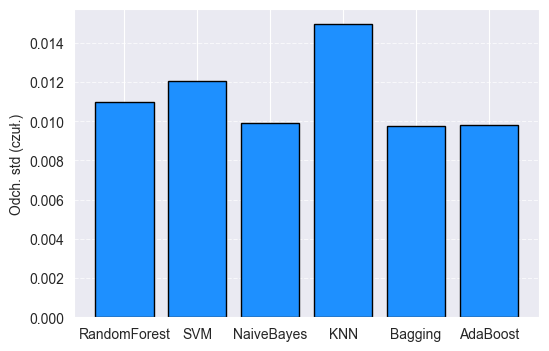

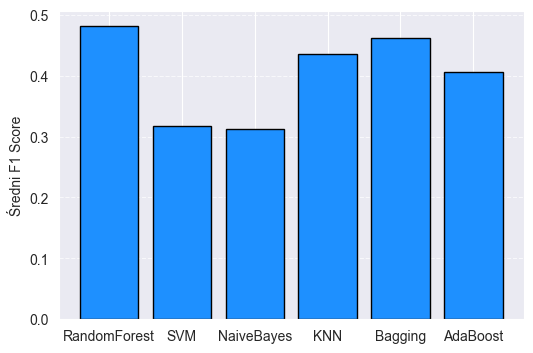

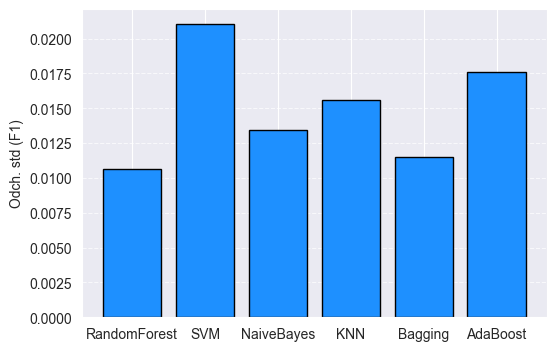

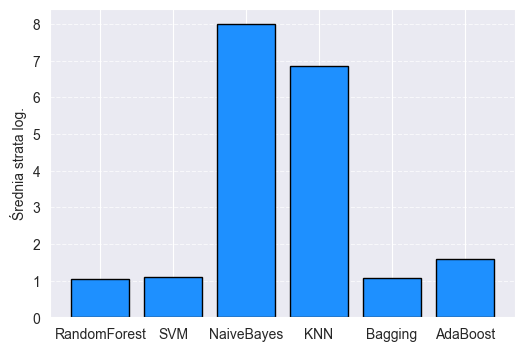

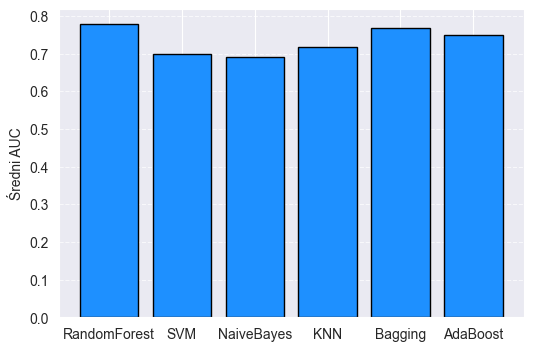

In [2]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

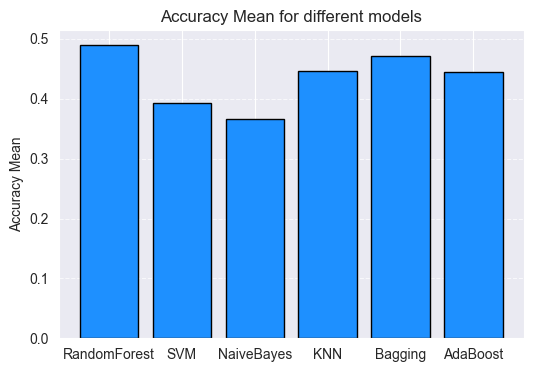

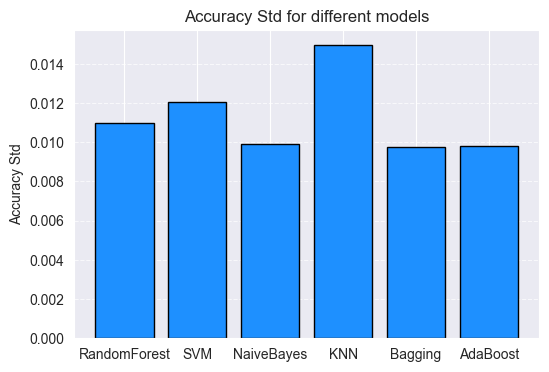

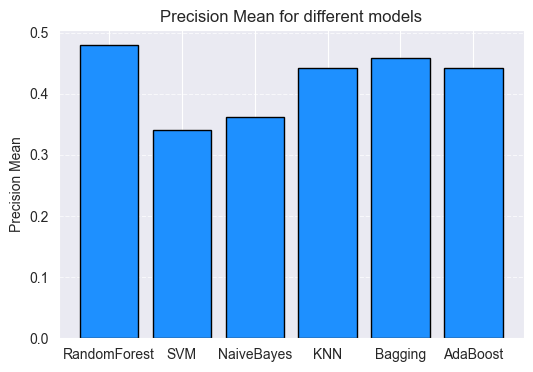

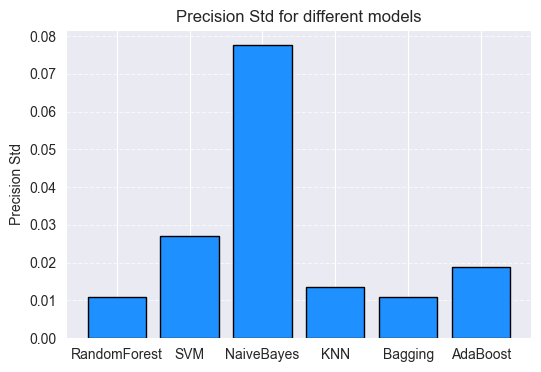

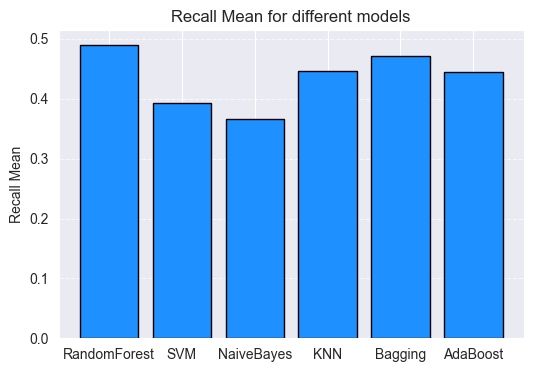

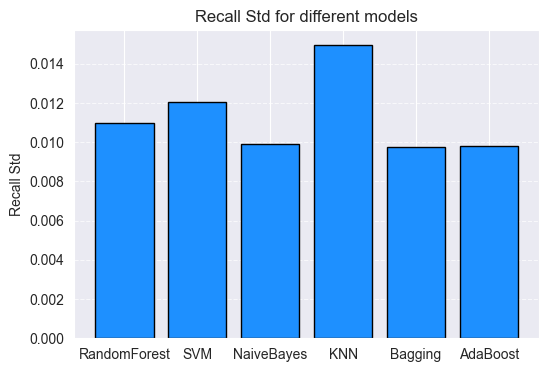

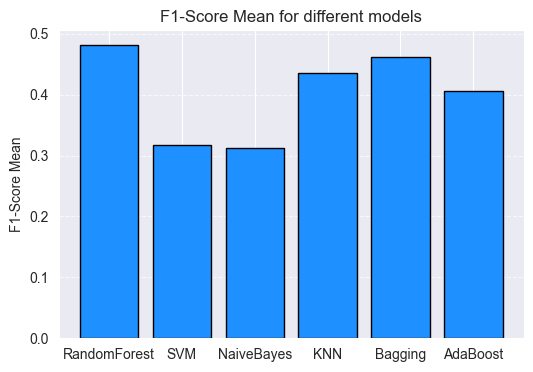

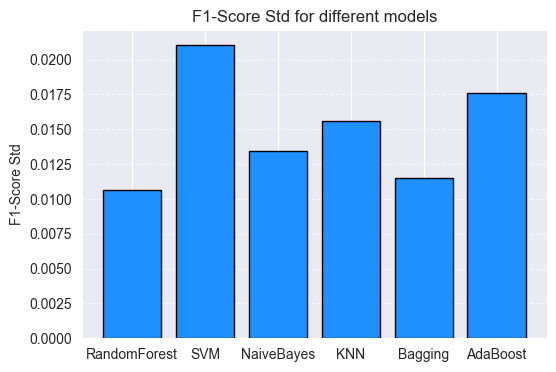

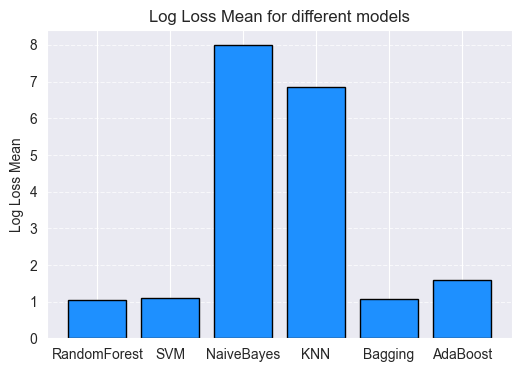

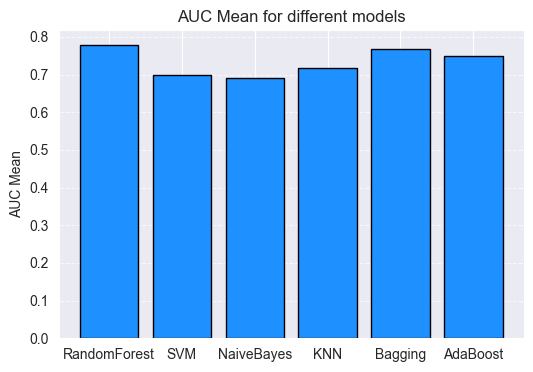

Best model: RandomForest with F1-Score = 0.48134910087509303
Worst model: NaiveBayes with F1-Score = 0.3128139407729886


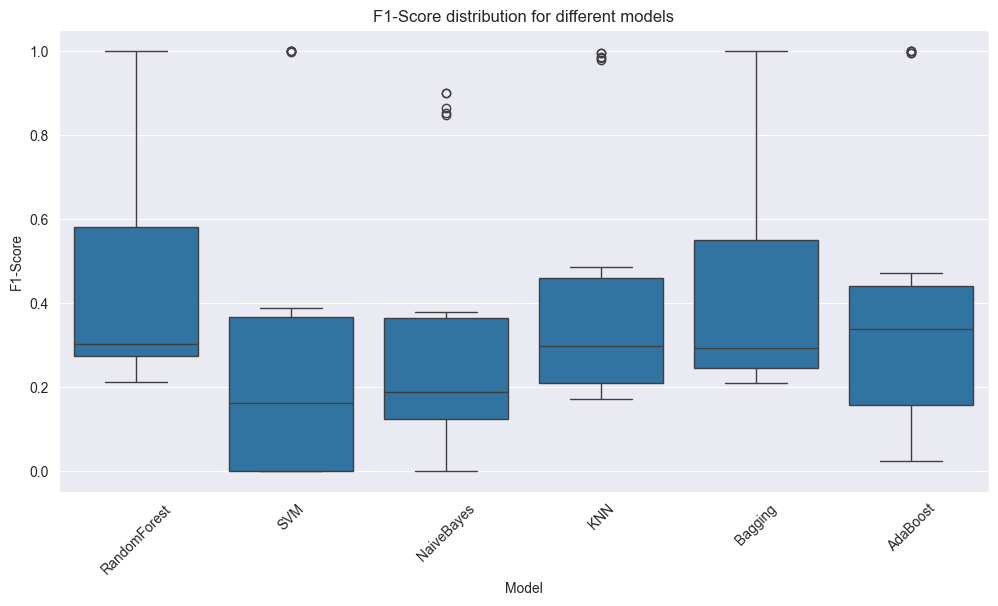

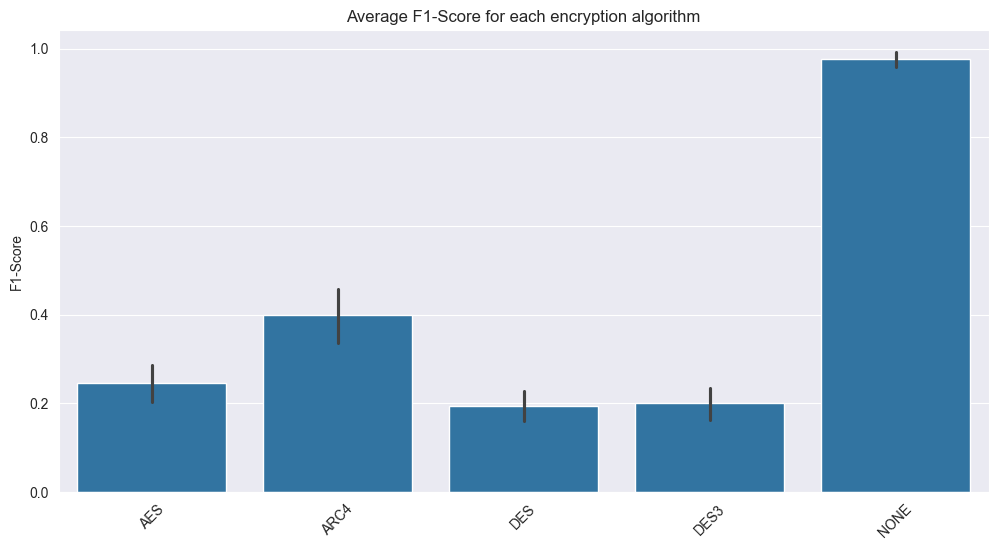

In [9]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [3]:
df_class_results_1key = pd.read_csv('df_class_results_1000_cbc_1key.csv')
df_class_results_1key

,0,RandomForest,0.1,0.232000,0.266055,0.247863
0,1,RandomForest,1,0.549618,0.587755,0.568047
1,2,RandomForest,2,0.263682,0.213710,0.236080
2,3,RandomForest,3,0.275109,0.272727,0.273913
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.303704,0.343096,0.322200
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.308036,0.274900,0.290526
145,146,AdaBoost,1,0.300319,0.817391,0.439252
146,147,AdaBoost,2,0.370370,0.042553,0.076336
147,148,AdaBoost,3,0.262500,0.087137,0.130841


In [14]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x160beda90>,
 <pandas.io.formats.style.Styler at 0x160bf6640>)

In [15]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.455167,0.012925,0.454354,0.016174,0.455167,0.012925,0.452852,0.013980,1.093281,0.747104
1,SVM,0.390167,0.014752,0.378343,0.039894,0.390167,0.014752,0.309424,0.025417,1.110858,0.701602
2,NaiveBayes,0.365500,0.008670,0.366585,0.055469,0.365500,0.008670,0.313908,0.013905,8.038767,0.680210
3,KNN,0.427000,0.021387,0.427671,0.022309,0.427000,0.021387,0.421974,0.021478,6.660931,0.705310
4,Bagging,0.464333,0.014581,0.464224,0.016865,0.464333,0.014581,0.462984,0.015122,1.091196,0.753485
5,AdaBoost,0.415167,0.008966,0.398591,0.057136,0.415167,0.008966,0.358868,0.019776,1.583276,0.718163


In [5]:
import pandas as pd
import io

csv_data = """
RandomForest,0.455167,0.012925,0.454354,0.016174,0.455167,0.012925,0.452852,0.013980,1.093281,0.747104
SVM,0.390167,0.014752,0.378343,0.039894,0.390167,0.014752,0.309424,0.025417,1.110858,0.701602
NaiveBayes,0.365500,0.008670,0.366585,0.055469,0.365500,0.008670,0.313908,0.013905,8.038767,0.680210
KNN,0.427000,0.021387,0.427671,0.022309,0.427000,0.021387,0.421974,0.021478,6.660931,0.705310
Bagging,0.464333,0.014581,0.464224,0.016865,0.464333,0.014581,0.462984,0.015122,1.091196,0.753485
AdaBoost,0.415167,0.008966,0.398591,0.057136,0.415167,0.008966,0.358868,0.019776,1.583276,0.718163
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.455167,0.012925,0.454354,0.016174,0.455167,0.012925,0.452852,0.013980,1.093281,0.747104
1,SVM,0.390167,0.014752,0.378343,0.039894,0.390167,0.014752,0.309424,0.025417,1.110858,0.701602
2,NaiveBayes,0.365500,0.008670,0.366585,0.055469,0.365500,0.008670,0.313908,0.013905,8.038767,0.680210
3,KNN,0.427000,0.021387,0.427671,0.022309,0.427000,0.021387,0.421974,0.021478,6.660931,0.705310
4,Bagging,0.464333,0.014581,0.464224,0.016865,0.464333,0.014581,0.462984,0.015122,1.091196,0.753485
5,AdaBoost,0.415167,0.008966,0.398591,0.057136,0.415167,0.008966,0.358868,0.019776,1.583276,0.718163


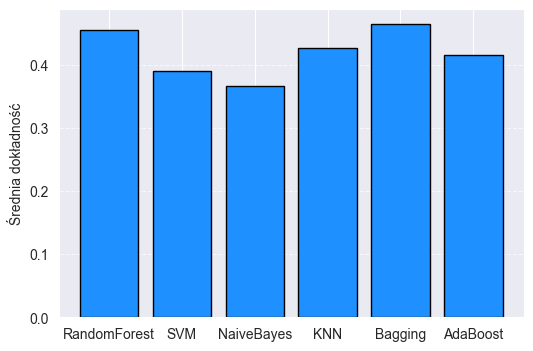

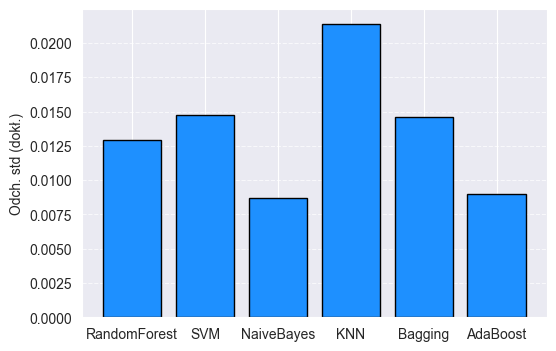

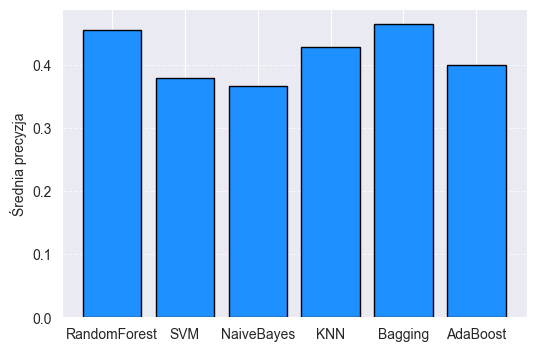

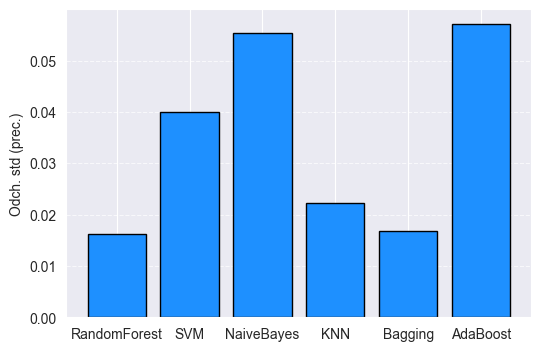

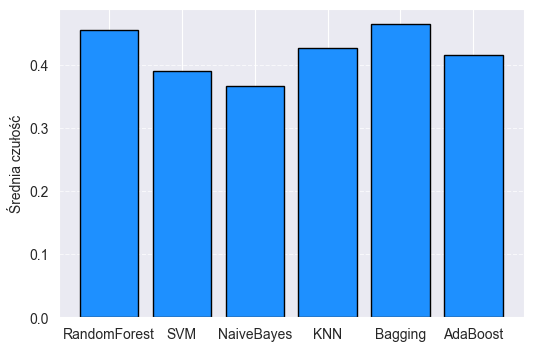

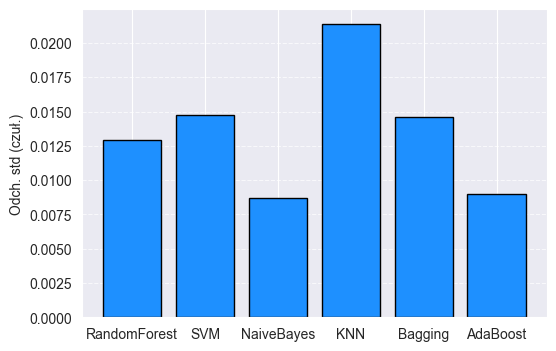

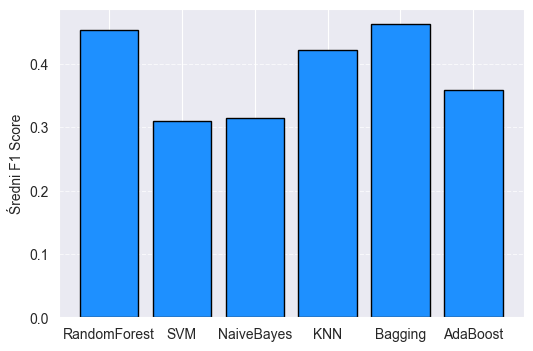

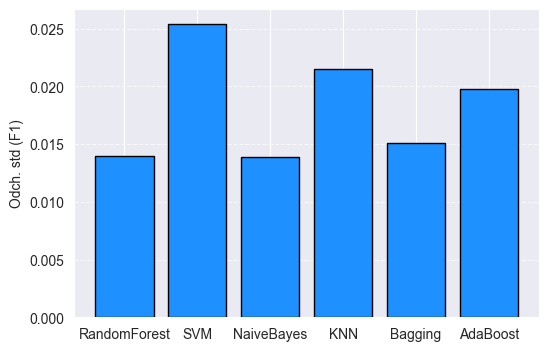

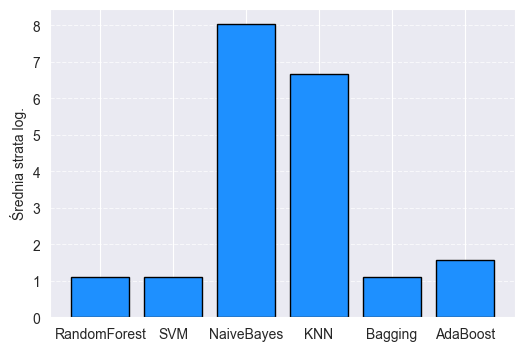

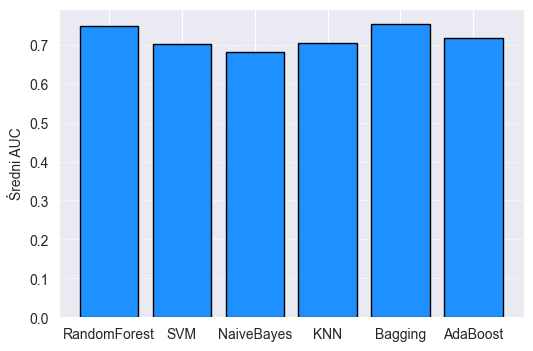

In [6]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

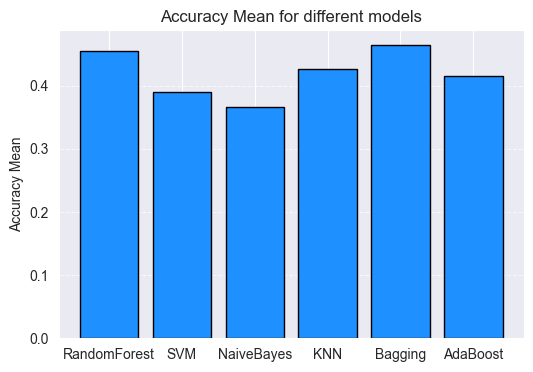

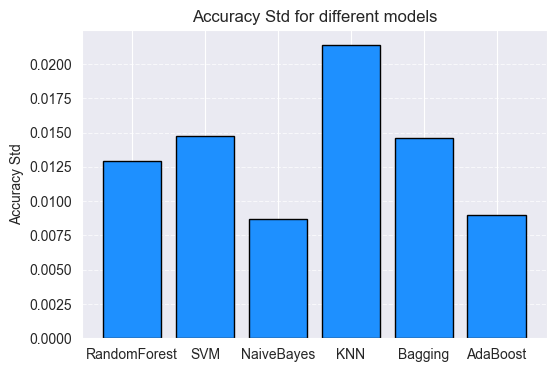

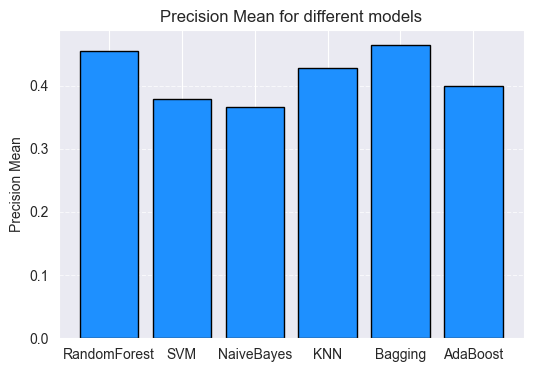

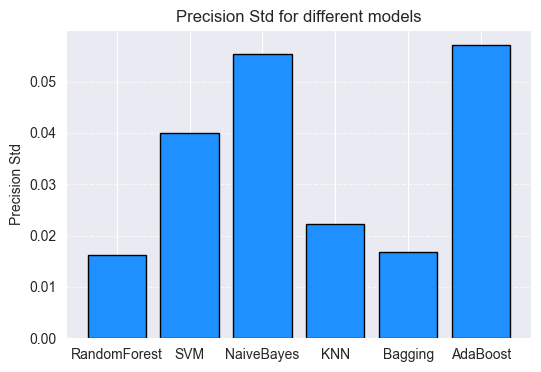

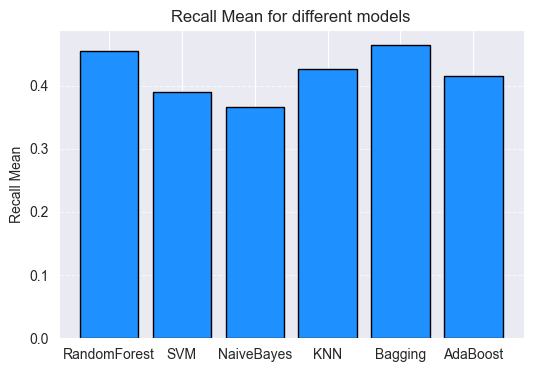

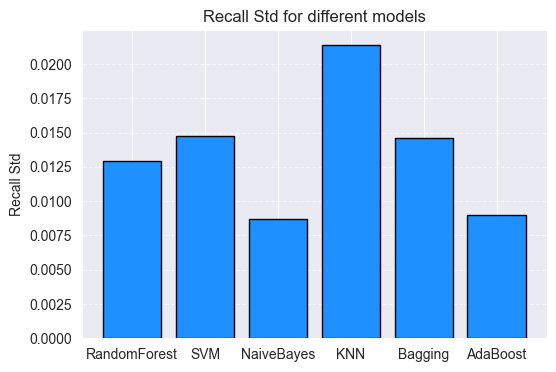

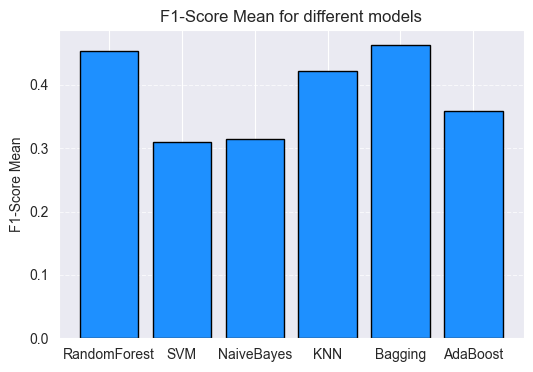

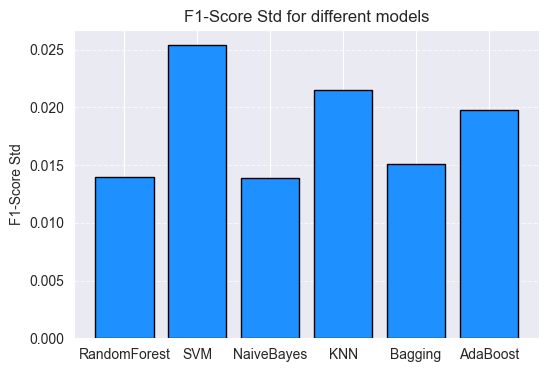

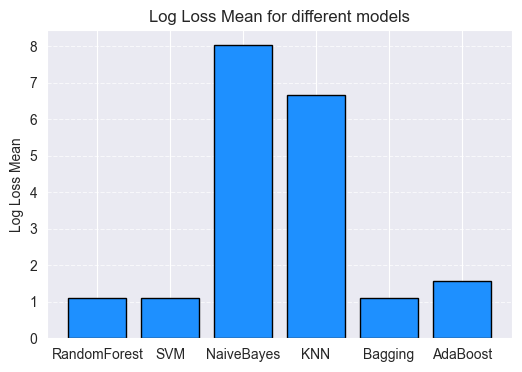

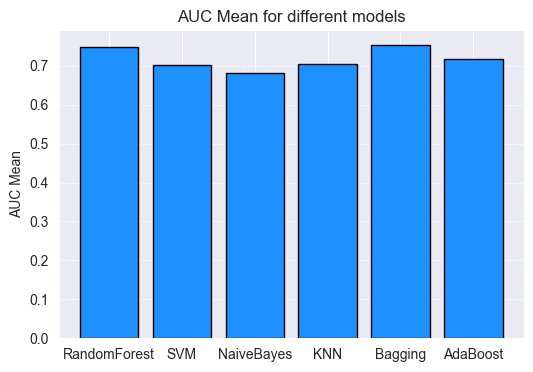

Best model: Bagging with F1-Score = 0.46274993978338436
Worst model: NaiveBayes with F1-Score = 0.3133993604516095


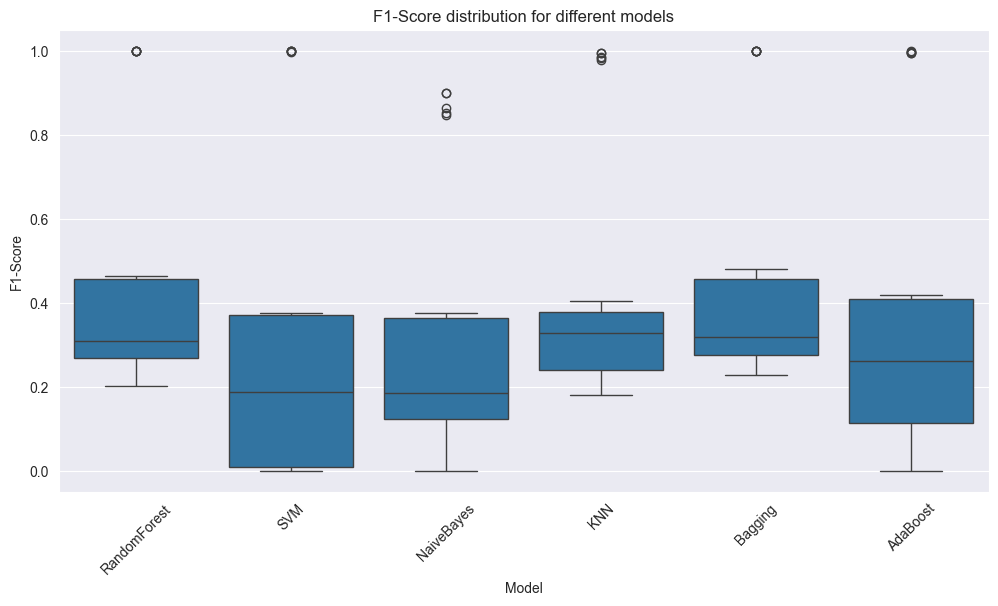

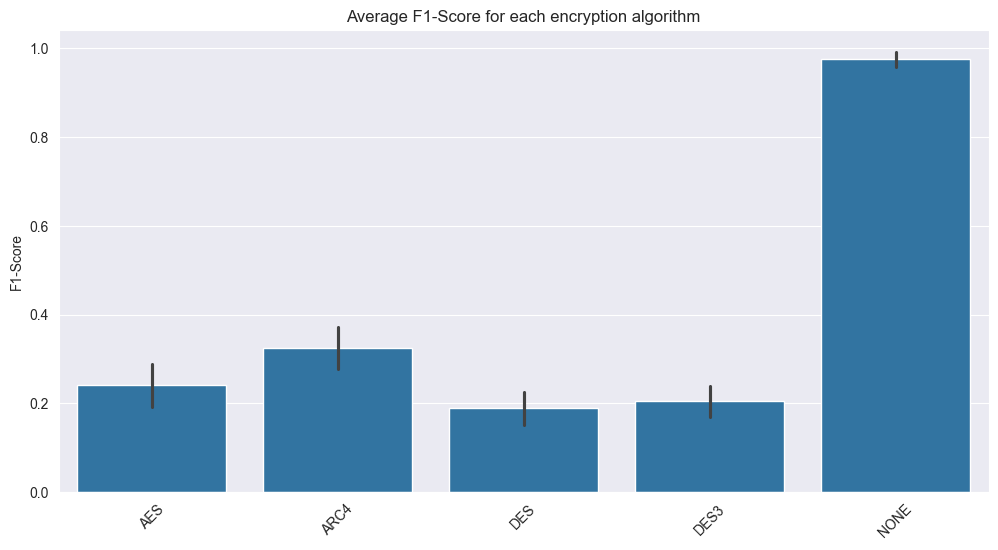

In [16]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [20]:
df_class_results_3keys = pd.read_csv('df_class_results_1000_cbc_3keys.csv')
df_class_results_3keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.270548,0.362385,0.309804
1,1,RandomForest,1,0.475771,0.440816,0.457627
2,2,RandomForest,2,0.316062,0.245968,0.276644
3,3,RandomForest,3,0.269565,0.268398,0.268980
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.320513,0.099602,0.151976
146,146,AdaBoost,1,0.276389,0.865217,0.418947
147,147,AdaBoost,2,0.205128,0.034043,0.058394
148,148,AdaBoost,3,0.283333,0.141079,0.188366


In [21]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jakubkowalewski/Desktop/pythonProject-main/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

(<pandas.io.formats.style.Styler at 0x1693f30d0>,
 <pandas.io.formats.style.Styler at 0x16a0f26a0>)

In [22]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.436333,0.011909,0.437109,0.013806,0.436333,0.011909,0.435587,0.012333,1.110203,0.729850
1,SVM,0.395667,0.013595,0.398373,0.066173,0.395667,0.013595,0.322009,0.022219,1.110816,0.698725
2,NaiveBayes,0.370500,0.003520,0.335493,0.033118,0.370500,0.003520,0.322428,0.005413,7.992295,0.679889
3,KNN,0.418833,0.019080,0.422427,0.018611,0.418833,0.019080,0.414810,0.018357,6.941109,0.696413
4,Bagging,0.442000,0.014000,0.440937,0.014750,0.442000,0.014000,0.440181,0.014402,1.117635,0.740063
5,AdaBoost,0.400500,0.010309,0.386070,0.080273,0.400500,0.010309,0.315900,0.016927,1.583587,0.709469


In [7]:
import pandas as pd
import io

csv_data = """
RandomForest,0.436333,0.011909,0.437109,0.013806,0.436333,0.011909,0.435587,0.012333,1.110203,0.729850
SVM,0.395667,0.013595,0.398373,0.066173,0.395667,0.013595,0.322009,0.022219,1.110816,0.698725
NaiveBayes,0.370500,0.003520,0.335493,0.033118,0.370500,0.003520,0.322428,0.005413,7.992295,0.679889
KNN,0.418833,0.019080,0.422427,0.018611,0.418833,0.019080,0.414810,0.018357,6.941109,0.696413
Bagging,0.442000,0.014000,0.440937,0.014750,0.442000,0.014000,0.440181,0.014402,1.117635,0.740063
AdaBoost,0.400500,0.010309,0.386070,0.080273,0.400500,0.010309,0.315900,0.016927,1.583587,0.709469
"""

# Definicje polskich nazw kolumn (11 kolumn, w tym AUC)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.436333,0.011909,0.437109,0.013806,0.436333,0.011909,0.435587,0.012333,1.110203,0.729850
1,SVM,0.395667,0.013595,0.398373,0.066173,0.395667,0.013595,0.322009,0.022219,1.110816,0.698725
2,NaiveBayes,0.370500,0.003520,0.335493,0.033118,0.370500,0.003520,0.322428,0.005413,7.992295,0.679889
3,KNN,0.418833,0.019080,0.422427,0.018611,0.418833,0.019080,0.414810,0.018357,6.941109,0.696413
4,Bagging,0.442000,0.014000,0.440937,0.014750,0.442000,0.014000,0.440181,0.014402,1.117635,0.740063
5,AdaBoost,0.400500,0.010309,0.386070,0.080273,0.400500,0.010309,0.315900,0.016927,1.583587,0.709469


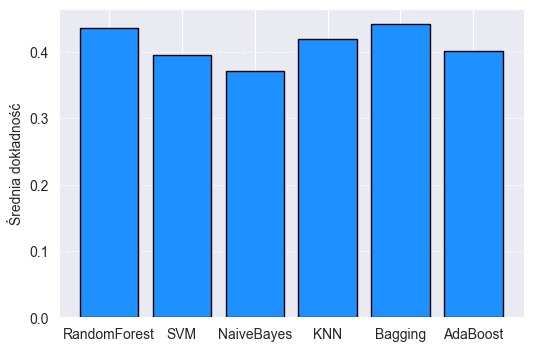

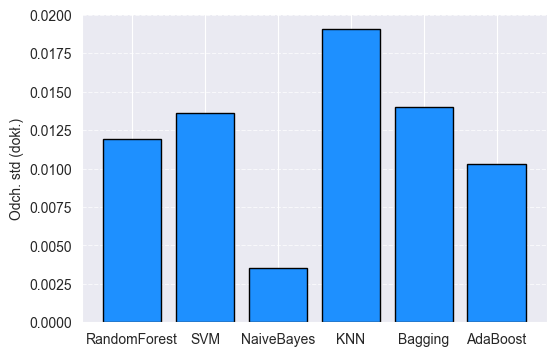

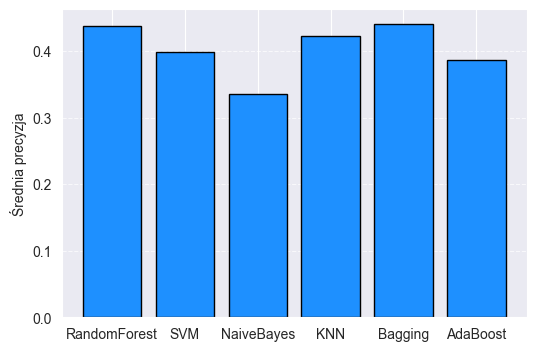

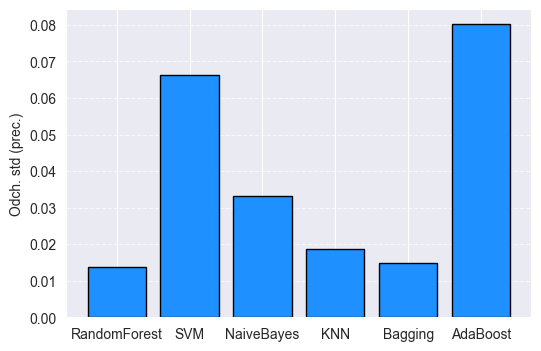

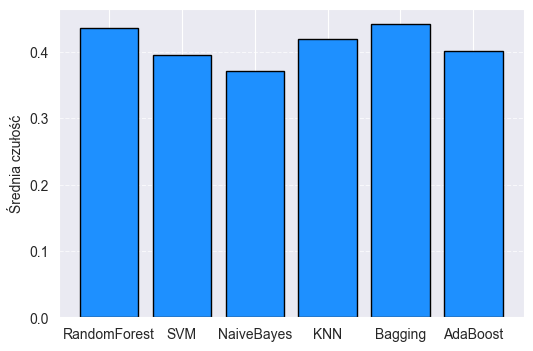

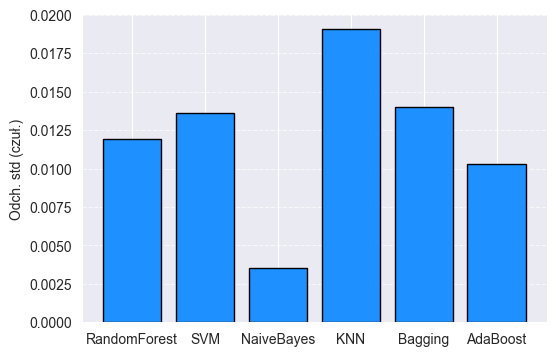

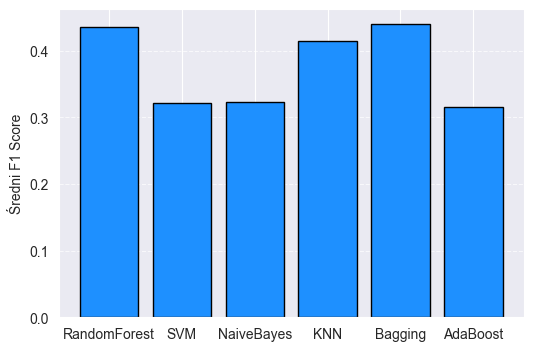

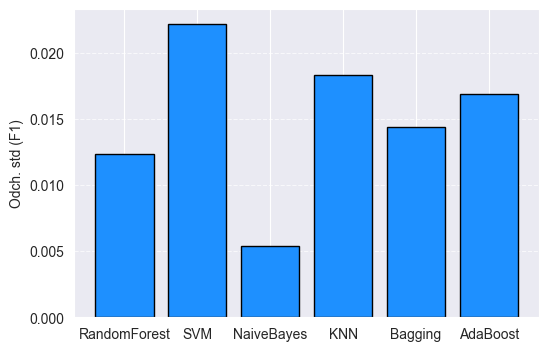

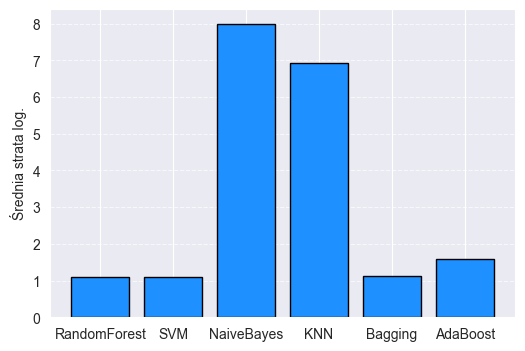

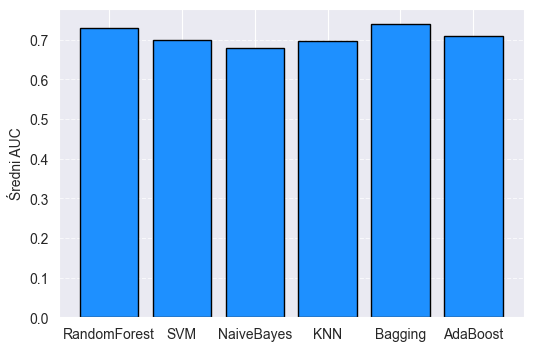

In [8]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

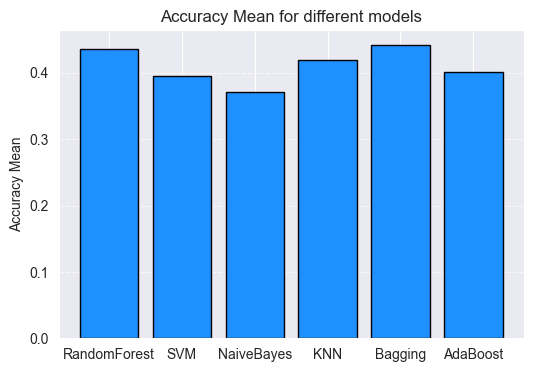

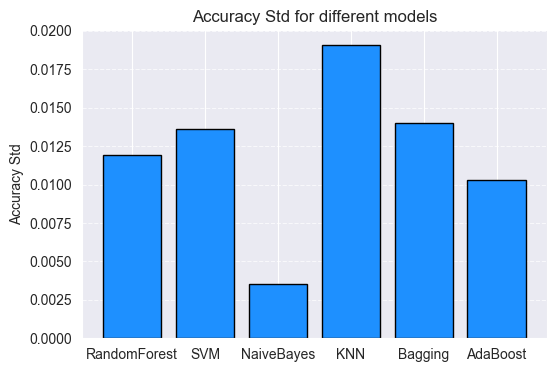

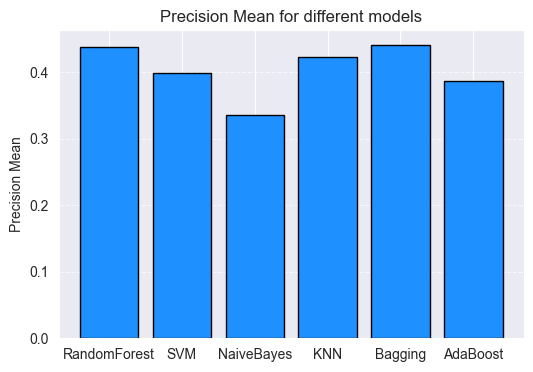

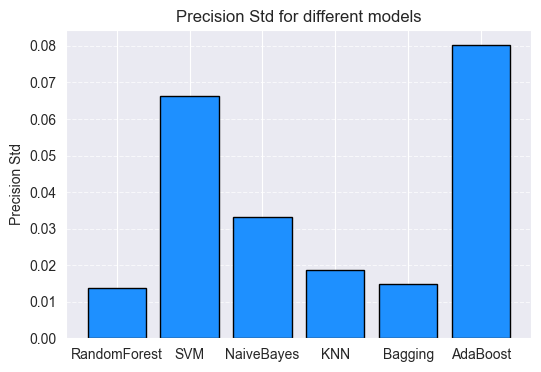

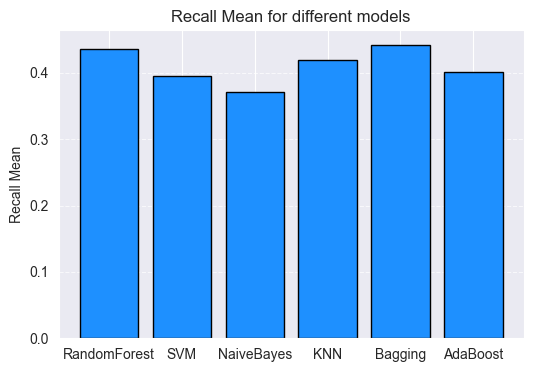

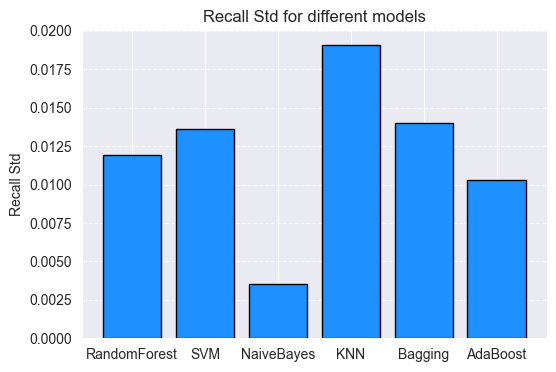

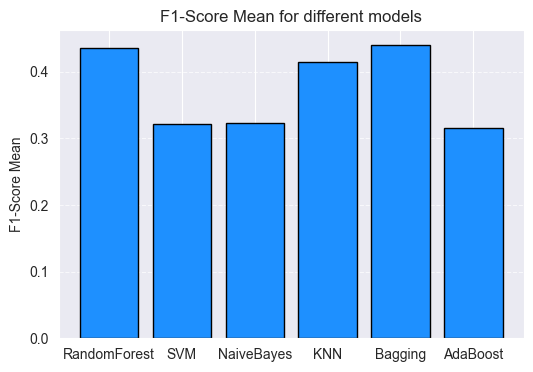

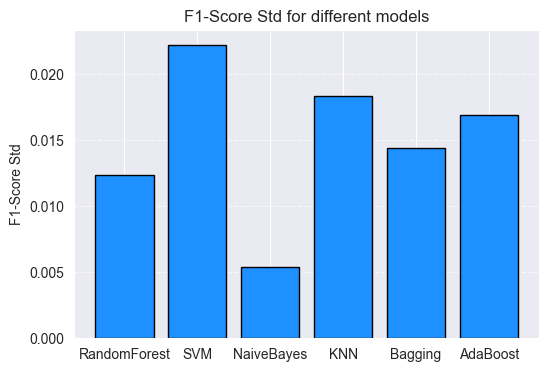

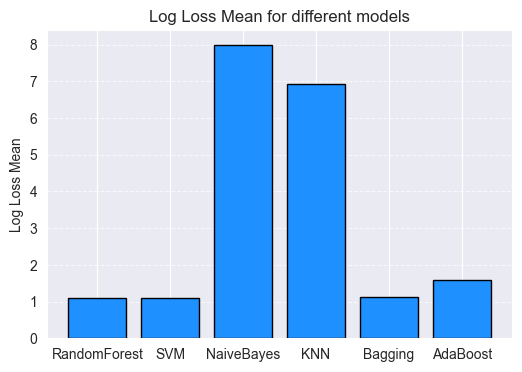

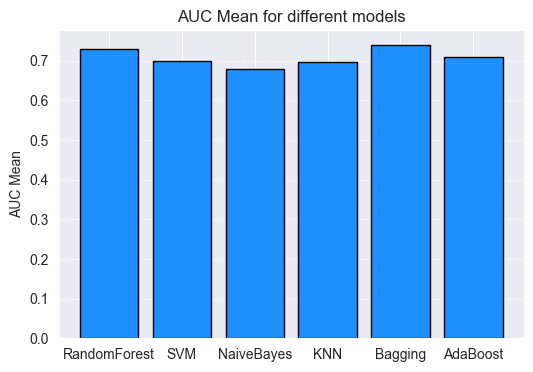

Best model: Bagging with F1-Score = 0.440130360493066
Worst model: AdaBoost with F1-Score = 0.3199360002420341


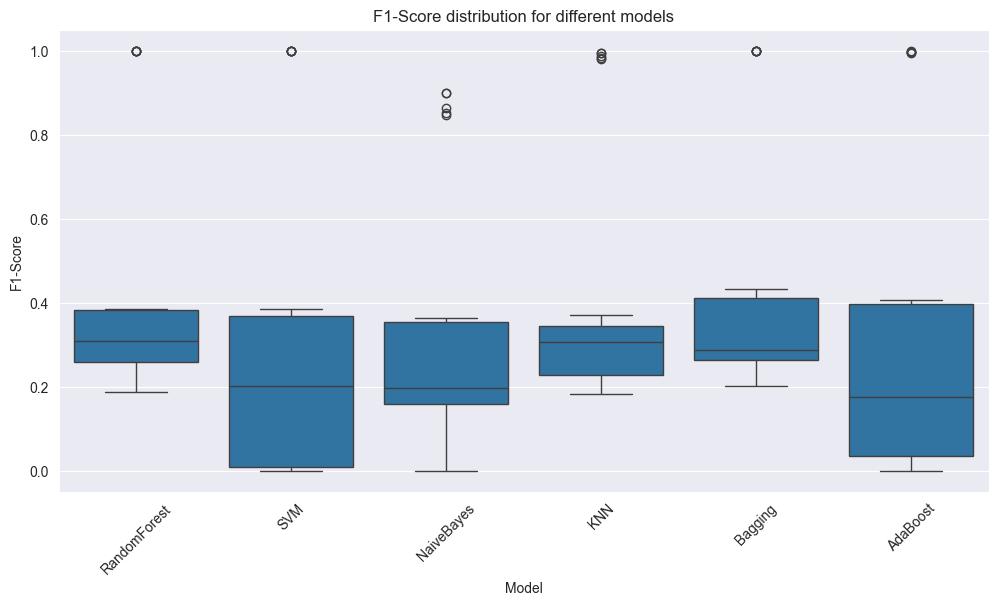

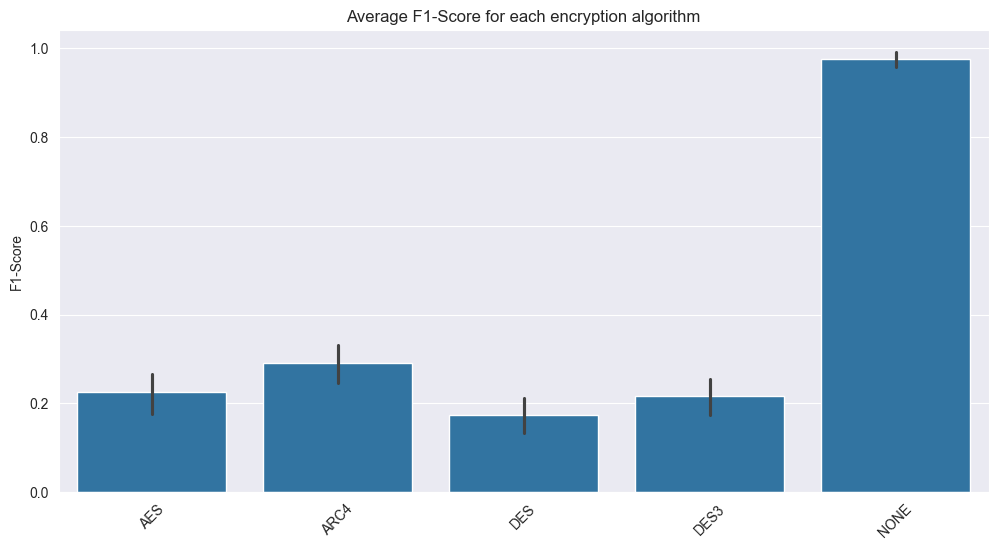

In [23]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [24]:
df_class_results

,Model,Class,Precision,Recall,F1-Score
0,RandomForest,0,0.236559,0.302752,0.265594
1,RandomForest,1,0.382353,0.371429,0.376812
2,RandomForest,2,0.316832,0.258065,0.284444
3,RandomForest,3,0.264574,0.255411,0.259912
4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...
145,AdaBoost,0,0.000000,0.000000,0.000000
146,AdaBoost,1,0.251765,0.930435,0.396296
147,AdaBoost,2,0.000000,0.000000,0.000000
148,AdaBoost,3,0.271028,0.120332,0.166667


In [25]:
df_class_results_6keys = pd.read_csv('df_class_results_1000_cbc_6keys.csv')
df_class_results_6keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.236559,0.302752,0.265594
1,1,RandomForest,1,0.382353,0.371429,0.376812
2,2,RandomForest,2,0.316832,0.258065,0.284444
3,3,RandomForest,3,0.264574,0.255411,0.259912
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.000000,0.000000,0.000000
146,146,AdaBoost,1,0.251765,0.930435,0.396296
147,147,AdaBoost,2,0.000000,0.000000,0.000000
148,148,AdaBoost,3,0.271028,0.120332,0.166667
